# Lab2 - Machine Learning
### 1. Linear Regression

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

In [2]:
# The following two functions (add_bias_1 and add_bias_2) do exactly the same thing but in a different way.
# They add another a column of ones in our data.

def add_bias_1(x):
    N, D = x.shape
    x_new = np.ones((N, D+1))
    x_new[:,1:] = x
    return x_new

def add_bias_2(x):
    return np.hstack((np.ones((x.shape[0],1)), x))

In [3]:
train_data = np.loadtxt('data/data1Tr.txt')
X_train = train_data[:,0].reshape(-1,1)
y_train = train_data[:,1]
X_test = np.loadtxt('data/data1Ts.txt',ndmin=2)
X_train = add_bias_2(X_train)
X_test = add_bias_2(X_test)
print "X_train: ", X_train.shape
print "y_train: ",  y_train.shape
print "X_test: ", X_test.shape

X_train:  (10, 2)
y_train:  (10,)
X_test:  (121, 2)


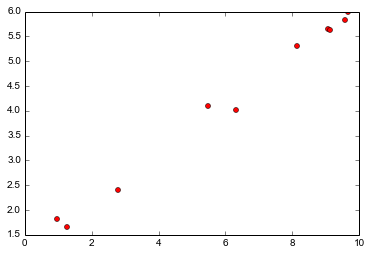

In [4]:
plt.plot(X_train[:,1:], y_train, 'ro', markersize = 5)
plt.show()



$$ w = \big(\lambda \mathbf{I} + \mathbf{X}^{\top} \mathbf{X} \big)^{-1}  \mathbf{X}^{\top}t $$

$$ y = w x $$

$$ \beta = \frac{N}{\sum_{n=1}^{N}\big(y_n -t_n \big)^2}$$

Check Bishop - Pattern Recognition and Machine Learning pages: 29, 140

In [5]:
def lin_reg_train(X, t, lamda):
    """
    
    :param X: N x (D+1) input data vector with ones already added in the first column
    :param y: N x 1 output data vector
    :param lamda: the positive regularizarion parameter 
    :return: w: the trained D+1 dimensional vector of the parameters    
             beta: the trained inverse variance parameter 
    """
    N, D = X.shape
    # Find the solution for w
    w = np.linalg.solve(X.T.dot(X)+lamda*np.eye(D), X.T.dot(t))
    
    # Model response/predictions (needed for computing beta)                        
    y = X.dot(w)
    
    # Find the parameter beta
    beta = N/np.sum(np.square(y-t))
    # alternative 
    # beta = N/((y-t).T.dot(y-t))
    
    return w, beta

In [6]:
def lin_reg_test(X_test, w, beta):
    """
    
    :param X: N x (D+1) input data vector with ones already added in the first column
    :param w: the D+1 dimensional vector of the parameters
    :param beta: the inverse variance parameter
    :return: y: Ntest x 1 vector of mean predictions   
             vtest: Ntest x 1 vector of predictive variances 
    """
    # mean predictions
    y = X_test.dot(w)
    
    # Variances
    vtest = 1/beta
    
    return y, vtest

In [7]:
# Train the model
w, beta = lin_reg_train(X_train, y_train, 0)

In [8]:
# Test the model
y, vtest = lin_reg_test(X_test, w, beta)

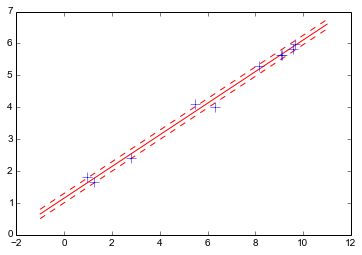

In [9]:
fig, ax = plt.subplots()
ax.plot(X_test[:,1],y, color='red')
ax.plot(X_test[:,1],y-np.sqrt(vtest), 'r--')
ax.plot(X_test[:,1],y+np.sqrt(vtest), 'r--')
ax.plot(X_train[:,1],y_train, 'b+', markersize=10)
plt.show()


## 2. Logistic Regression

#### Sigmoid function

$$\sigma(a) = \frac{1}{1 + e^{-a}}$$

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

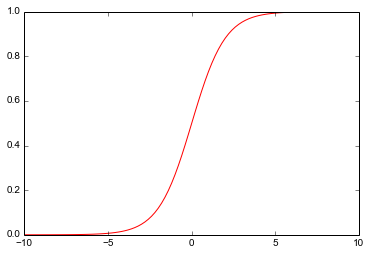

In [11]:
x = np.arange(-10., 10., 0.2)
plt.plot(x, sigmoid(x),'r')
plt.show()

Bishop - Pattern Recognition and Machine Learning, page 205

$$ p\big(c=1 \mid \mathbf{x}\big) = \sigma \big(b + \mathbf{x}^{\top} \mathbf{w}\big) $$

$$ y_n = \sigma \big(b + \mathbf{x}^{\top} \mathbf{w}\big)  $$

$$ E(w) = \sum_{n=1}^{N} \big\{ t_n  \ln y_n +(1−t_n)\ln(1−y_n)\big\}- \frac{1}{2}\lambda \lVert \mathbf{w} \rVert^2$$

In this case we use gradient ascent to maximize Ew.

<!-- $$ \nabla _w E = \sum_{n=1}^{N} \Big( t_n - \sigma \big(b + \mathbf{x}^{\top} \mathbf{w}\big)  \mathbf{x} \Big) $$  -->

$$ \nabla _w E = \sum_{n=1}^{N} \Big\{ x_n(t_n - y_n) \Big\}- \lambda \mathbf{w} $$



In [12]:

def log_reg_train(t, X, lamda, winit, options):
    """inputs :
      t: N x 1 binary output data vector indicating the two classes
      X: N x (D+1) input data vector with ones already added in the first column
      lamda: the positive regularizarion parameter
      winit: D+1 dimensional vector of the initial values of the parameters
      options: options(1) is the maximum number of iterations
               options(2) is the tolerance
               options(3) is the learning rate eta
    outputs :
      w: the trained D+1 dimensional vector of the parameters"""

    w = winit

    # Maximum number of iteration of gradient ascend
    _iter = options[0]

    # Tolerance
    tol = options[1]

    # Learning rate
    eta = options[2]

    Ewold = -np.inf

    for i in range(_iter):
        yx = X.dot(w.T)
        s = sigmoid(yx)
        
        # Compute the cost function to check convergence
        Ew = np.sum(t*np.log(s)+(1-t)*np.log(1-s))-0.5*lamda * (w.T.dot(w))
        
        # Show the current cost function on screen
        print('iteration %d' % i)
        print('cost function :', Ew)

        # Break if you achieve the desired accuracy in the cost function
        if np.abs(Ew - Ewold) < tol:
            break

        # Gradient
        gradient = X.T.dot(t-s)-lamda*w
        
        # Update parameters based on gradient ascend
        w = w + eta*gradient

        Ewold = Ew

    return w

In [13]:
def log_reg_test(w, Xtest):
    # inputs :
    #   w: the D+1 dimensional vector of the parameters
    #   Xtest: Ntest x (D+1) input test data with ones already added in the first column
    # outputs :
    #   test: the predicted class labels
    #   ytest: Ntest x 1 vector of the sigmoid probabilities

    # Mean predictions
    ytest = sigmoid(Xtest.dot(w))

    # Hard classification decisions
    ttest = np.round(ytest)

    return ttest, ytest

iteration 0
('cost function :', -27.725887222397812)
iteration 1
('cost function :', -24.466297411714265)
iteration 2
('cost function :', -22.536511572446159)
iteration 3
('cost function :', -22.116229369707959)
iteration 4
('cost function :', -23.074381449108426)
iteration 5
('cost function :', -25.333748012251931)
iteration 6
('cost function :', -24.993065971862258)
iteration 7
('cost function :', -24.835293143728418)
iteration 8
('cost function :', -21.399105758000168)
iteration 9
('cost function :', -19.558810626741636)
iteration 10
('cost function :', -16.907541699538591)
iteration 11
('cost function :', -15.286912148987998)
iteration 12
('cost function :', -13.823184823072975)
iteration 13
('cost function :', -12.891475520245152)
iteration 14
('cost function :', -12.205873931821335)
iteration 15
('cost function :', -11.755709046930185)
iteration 16
('cost function :', -11.431865277310443)
iteration 17
('cost function :', -11.190401370425885)
iteration 18
('cost function :', -10.9

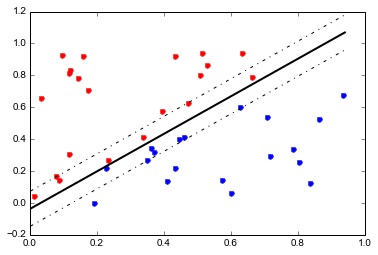

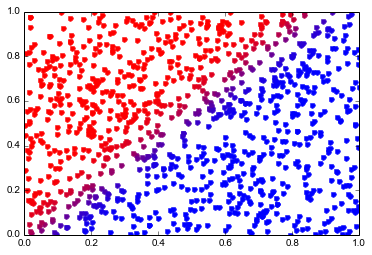

In [14]:
def main():
    # train data file name
    train_file = 'data/data2Tr.txt'

    # read train txt file and store columns to X and t respectively
    train_data = np.loadtxt(train_file)
    X = train_data[:,:2]
    t = train_data[:,2]

    # test data file name
    test_file = 'data/data2Ts.txt'

    # read train txt file and store to Xtest
    test_data = np.loadtxt(test_file)
    Xtest = test_data

    # N of X
    N, D = X.shape

    # Ntest of Xtest
    Ntest = Xtest.shape[0]

    # add ones as first to X
    X = add_bias_2(X)

    # add ones as first to Xtest    
    Xtest = add_bias_2(Xtest)

    # initialize w for the gradient ascent
    # winit = np.zeros((1, D + 1))
    winit = np.zeros((D+1))

    # regularization parameter
    lamda = 0

    # options for gradient descent
    options = [500, 1e-6, 8 / N]

    # Train the model
    w = log_reg_train(t, X, lamda, winit, options)

    # test the model
    ttest, ytest = log_reg_test(w, Xtest)
    print ttest.shape

    x = X[:, 1]
    y = X[:, 2]
    plt.plot(x[t == 0], y[t == 0], 'r.', markersize = 10)
    plt.plot(x[t == 1], y[t == 1], 'b.', markersize = 10)
    

    minX = np.min(X[:, 2])
    maxX = np.max(X[:, 2])
    y = [- w[0] / w[2] - (w[1] / w[2]) * minX, - w[0] / w[2] - (w[1] / w[2]) * maxX]
    plt.plot([minX, maxX], y, 'k', linewidth = 2)
    plt.plot([minX, maxX], - np.log(0.9 / 0.1) / w[2] + y, 'k-.', linewidth = 1)
    plt.plot([minX, maxX], - np.log(0.1 / 0.9) / w[2] + y, 'k-.', linewidth = 1)
    plt.show()
    for i in range(Ntest):
        plt.plot(Xtest[i, 1], Xtest[i, 2], '.', markersize = 10, c = (1 - ytest[i], 0, ytest[i]))
    plt.show()

main()